## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these.

For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  My goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

### *Step-by-step solution*

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`. 

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#read csv file and show firsts rows
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.value_counts() #checking total number of converted users

0    259241
1     35237
Name: converted, dtype: int64

In [6]:
# proportion of users converted
df.converted.sum()/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
len(df[(df['group']=="treatment")!=(df['landing_page']=="new_page")])

3893

f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**None of the rows have missing values**

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Create a new dataframe without the rows in witch treatment does not match with new_page 
# or control does not match with old_page
df2 = df[(df['group']=="treatment")==(df['landing_page']=="new_page")]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [11]:
#Get information about the new dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`3.` Use **df2** to answer questions:

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# Print the duplicated user_id
duplicated_id=df2.loc[df2.user_id.duplicated(), 'user_id']
duplicated_id

2893    773192
Name: user_id, dtype: int64

The user_id repeated is: 773192

c. What is the row information for the repeat **user_id**? 

In [14]:
# Show the duplicated user_id information
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
# Delete duplicated id_user
df2 = df2.drop_duplicates(['user_id'], keep='first')

In [16]:
df2.user_id.nunique()

290584

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** to answer the questions:

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
df2[df2['group']=='control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
df2[df2['group']=='treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
len(df2[df2['landing_page']=='new_page']) / df2.shape[0]

0.5000619442226688

e. Consider the results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

By simple observations of our data and using probabilities, we came to obtain these results:

1. The **conversion probability** for a user who sees the old page (**control group**) is **12.04%**
2. The **conversion probability** for a user who sees the new page (**treatment group**) is **11.88%**
3. 50% of total users see the new page and 50% the old page, so **the sample is not unbalanced**.

### Therefore, based solely on the observed data, we conclude that the conversion rate is slightly higher with the old page.

<a id='ab_test'></a>
### Part II - A/B Test

Because of the time stamp associated with each event, I could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  


`1.` For now, I will consider I need to make the decision just based on all the data provided.  If I assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should the null and alternative hypotheses be?  

$$H_0:  p_{old} - p_{new} \geq 0$$
$$H_1:  p_{old} - p_{new} < 0$$

`2.` I will now assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, I also assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

By using a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

I perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [22]:
p_new=df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [23]:
p_old=df2.converted.mean()
p_old

0.11959708724499628

In [24]:
p_new-p_old

0.0

c. What is $n_{new}$, the number of individuals in the treatment group?

In [25]:
n_new=len(df2.query("group == 'treatment'"))
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [26]:
n_old=len(df2.query("group == 'control'"))
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
# simulation of n_new transactions with a conversion rate of  p_new  under the null.
new_page_converted = np.random.choice([0, 1], size = n_new, p = [p_new, 1-p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
# simulation of n_old transactions with a conversion rate of  p_old  under the null.
old_page_converted = np.random.choice([0, 1], size = n_old, p = [p_old, 1-p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
# Compute the difference observed between the simulation of conversion for both new and old pages
obs_diff= new_page_converted.mean() - old_page_converted.mean()
obs_diff

-0.00068610768718491144

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [30]:
# Create a sampling distribution of the difference in proportions with bootstrapping
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1, 0],n_new,replace = True,p = [p_new, 1-p_new])
    old_page_converted = np.random.choice([1, 0],n_old,replace = True,p = [p_old, 1-p_old])
    p_new2 = new_page_converted.mean()
    p_old2 = old_page_converted.mean()
    p_diffs.append(p_new2-p_old2)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

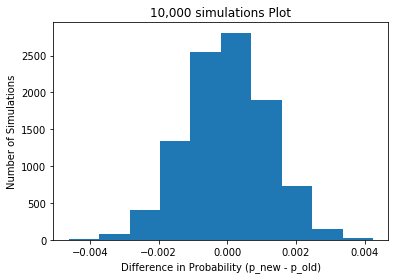

In [31]:
plt.hist(p_diffs);
plt.ylabel('Number of Simulations')
plt.xlabel('Difference in Probability (p_new - p_old)')
plt.title('10,000 simulations Plot');

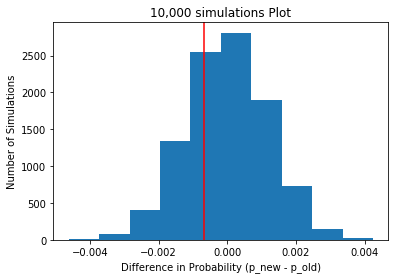

In [32]:
plt.hist(p_diffs);
plt.ylabel('Number of Simulations')
plt.xlabel('Difference in Probability (p_new - p_old)')
plt.title('10,000 simulations Plot');
plt.axvline(x=obs_diff.mean(), color = 'red'); # where our obs_diff mean falls on null dist

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
act_obs_diffs = df2[df2['group']=='treatment']['converted'].mean() - df2[df2['group']=='control']['converted'].mean()
print(act_obs_diffs)
(p_diffs > act_obs_diffs).mean()

-0.00157823898536


0.90939999999999999

k. Explanation of what I just computed in part **j.** answering the questions: What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

the value calculated as the proportion of the p_diffs that are greater than the actual difference observed in our data, is the one known as **p-value**.

The formal definition of a p-value is the **probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.**

When the **p-value is large, we have evidence that our statistic was likely to come from the null hypothesis**, but how do we know if our p-value is large enough? By comparing our p-value to our type I error threshold (α), we can make our decision about which hypothesis we will choose as follows:

$$pval \leq \alpha \rightarrow Reject H_0$$
$$pval \geq \alpha \rightarrow Fail.To.Reject H_0$$

 - As we can see our p-value is 0.9072.
 - The alpha data (Type I error rate), has been given in the problem statement: 5% (0.05)
 
 $$ pval = 0.904 > 0.05 = \alpha$$

Therefore, we fail to reject the null hypothesis. We do not have sufficient evidence to suggest the new page converted rate is better than the old page converted rate.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Below, I calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm

convert_old = len(df2.query('landing_page=="old_page" and converted==1'))
convert_new = len(df2.query('landing_page=="new_page" and converted==1'))
n_old = len(df2.query('landing_page=="old_page"'))
n_new = len(df2.query('landing_page=="new_page"'))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [35]:
# description: sm.stats.proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False) where:
#  - count = the number of successes for each independent sample --> convert_old, convert_new
#  - nobs = the number of trials or observations, with the same length as count --> n_old, n_new
#  - alternative = smaller, means that the alternative hypothesis is prop < value
# Returns: A. zstat(z-score): test statistic for the z-test; B. p-value: p-value for the z-test

# Compute zstat and p_value
zstat, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
#  Display zstat and p_value
print(zstat, p_value)

1.31092419842 0.905058312759


n. What do the z-score and p-value computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [36]:
from scipy.stats import norm
#significance our z_score is
norm.cdf(zstat)

0.90505831275902449

In [37]:
#critical value of 95% confidence
norm.ppf(1-(0.05))

1.6448536269514722

 From our results we obtain:
 
 $$ z_-score = 1.310 > 1.645 = Critical_-value$$
 
**We fail to reject the null hypothesis**, therefore, as we concluded in the questions j. and k., we do not have sufficient evidence to suggest the new page converted rate is better than the old page converted rate. --> **Same conclusion as in j. and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression, because it predicts a probability between 0 and 1.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [38]:
# Add an intercept column
df2['intercept'] = 1

# Create a dummy variable column
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment'] # ab_page values are 1 only if treatment value for the same row is 1
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [39]:
import statsmodels.api as sm
model=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-05 20:49 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

**The p-value associated with the ab_page is 0.1899**

If we compare it with the p-value obtained in the part II (p-value = 0.904), **we can see the p-value calculated with logistic regression is much lower than the one obtained in part II:**

 $$ pval(partII) = 0.904 >> 0.1899 = pval(partIII)$$
 
**In logistic regression:**

$$H_0:  p_{old} - p_{new} = 0$$
$$H_1:  p_{old} - p_{new} \neq 0$$

**In part II:**

$$H_0:  p_{old} - p_{new} \geq 0$$
$$H_1:  p_{old} - p_{new} < 0$$

f. Now, I consider other things that might influence whether or not an individual converts.  Why it is a good idea to consider other factors to add into your regression model. Are there any disadvantages to adding additional terms into your regression model?

**We could consider other factors such as gender, age, country, age of the webpage visitors etc. There would be a problem if those variables would be related with each other, because when x-variables are related to one another, we can have flipped relationships due to multicollinearity. This could be fixed by removing the variables that is most related to the other variables using the Variance Inflation Factor (VIFi>10).**

**It is also important to take into consideration other factors of your situation that might not be considered directly in the results of your hypothesis test or confidence interval, this is due to the importance to consider the practical significance. There are some constraints such as money to make the new webpage or the time spent on it, these might not be accounted for directly in the statistical test, so these wouldn't affect the results of our test.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  

In [41]:
# Read the countries dataset
country_df = pd.read_csv('countries.csv')
country_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [42]:
# join the two datasets (inner join)
df_new_c = country_df.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
df_new_c.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [43]:
# Add an intercept column
df_new_c['intercept'] = 1

# Create a dummy variable column for the country (CA=baseline)
df_new_c[['UK','US']] = pd.get_dummies(df_new_c['country'])[['UK','US']]
df_new_c.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [44]:
model=sm.Logit(df_new_c['converted'],df_new_c[['intercept','ab_page', 'UK', 'US']])
results=model.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-05 20:49 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

h. Though I have now looked at the individual factors of country and page on conversion, I would now like to look at an interaction between page and country to see if there are significant effects on conversion. For that, I will create the necessary additional columns, and fit the new model.  

I provide the summary results, and my conclusions based on the results.

In [45]:
df_new_c['ab_page_US'] = df_new_c['ab_page']*df_new_c['US']
df_new_c['ab_page_UK'] = df_new_c['ab_page']*df_new_c['UK']
df_new_c.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,ab_page_US,ab_page_UK
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0,1


In [46]:
logit_mod = sm.Logit(df_new_c['converted'], df_new_c[['intercept', 'ab_page', 'US', 'UK', 'ab_page_US', 'ab_page_UK']])
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-05 20:49 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
ab_page_US     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
ab_page_UK     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

**We can conclude that none of the variables have significant p-values, because none of these are smaller than the Type I error (\alpha = 0.05). Therefore, we fail to reject the null. There is not sufficient evidence to determine if the interaction between country and page received will predict whether a user converts or not.**

## As we discovered earlier, we do not have sufficient evidence to suggest the new page converted rate is better than the old page converted rate.